In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

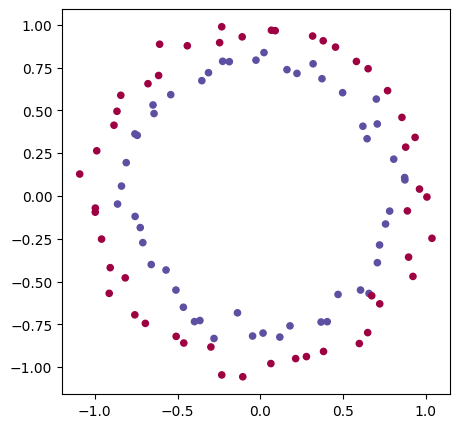

In [4]:
# generate a data set

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.05)

y = y*2 - 1 # make y be -1 or 1 for outer and inner circle respectively.

# visualise the data in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Spectral')

In [ ]:
def loss(Xdat,ydat,model):
    """Returns the total loss (C(theta) + regularisation) and the accuracy of the neural network."""
    
    inputs = [list(map(Value, xrow)) for xrow in Xdat]
    scores = list(map(model, inputs))
    
    # compute data loss
    # svm "max-margin" loss - from micrograd demo example
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(ydat, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss #loss function + regularisation

    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(ydat, scores)]
    
    return total_loss, accuracy

In [ ]:
def learning_rate(i, n_steps):
    '''Returns a linearly decreasing learning rate.'''
    return 1.0 - 0.99*i/n_steps

In [ ]:
def gd(model, n_steps=100):
    '''
    A function that optimises the parameters of the neural network in n_steps steps using gradient descent.
    Return a list of losses and a list of accuracies during training 
    '''
    
    losses = []
    accuracies = []

    for step in range(n_steps):

        # forward pass
        total_loss, acc = loss(X, y, model)
        losses.append(total_loss.data)
        accuracies.append(acc) #Computing the mean of the accuracy list to obtain overall accuracy
        


        # backward pass
        model.zero_grad()
        total_loss.backward()
    

        # update

        
        lr = learning_rate(step, n_steps)
              
        for p in model.parameters():
            p.data -= lr * p.grad

        if step % 10 == 0 or step == n_steps-1:
            print(f"step {step} loss {total_loss.data}, accuracy {np.mean(acc)*100}%")
    
    return losses, accuracies

NameError: name 'modelgd' is not defined

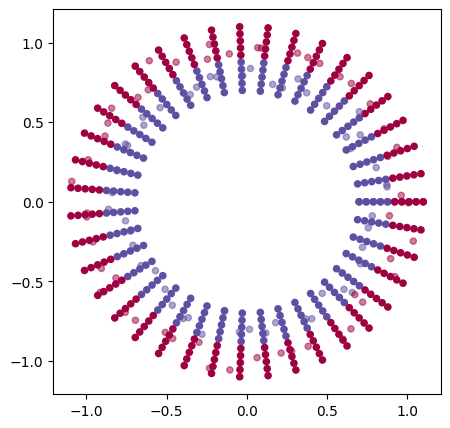

In [7]:
# Test set
phi = np.linspace(0, 2*np.pi, 40)
r   = np.linspace(0.7, 1.1,   10)

Xtest = np.zeros((len(phi)*len(r), 2))
i=0
for r0 in r:
    for phi0 in phi:
        Xtest[i,:] = np.array([r0*np.cos(phi0),r0*np.sin(phi0)])
        i+=1
ytest = np.hstack([(1*(radius<0.9)-1*(radius>0.9))*np.ones(len(phi), dtype=np.intp) for radius in r])

plt.figure(figsize=(5,5))
plt.scatter(Xtest[:,0], Xtest[:,1], c=ytest, s=20, cmap='Spectral')
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Spectral', alpha=0.5)

### GENERALISATION ERROR ###
# TO DO
def test(Xtest, ytest, model):
    """Returns the accuracy of the model on the testing set."""

    inputs = [list(map(Value, xrow)) for xrow in Xtest]
    scores = list(map(model, inputs))
    
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(ytest, scores)]
    
    return np.mean(accuracy) * 100

acc_test = test(Xtest, ytest, modelgd)
print(f"Accuracy on testing set: {acc_test}%")
print(f"Generalisation error on testing set: {100-acc_test}%")